In [1]:
import spacy
import math
from spacytextblob.spacytextblob import SpacyTextBlob
import numpy as np
import pandas as pd
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

/Users/gokberk/miniconda3/envs/ml4hc_project2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/gokberk/miniconda3/envs/ml4hc_project2/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
doc_df = pd.read_csv('tables/doc_69_76.csv')
id_to_text_list = doc_df['id_to_text'].values
free_text_list = doc_df['text'].values

In [3]:
entity_sent_dict = {}

unwanted_entities = ['DATE','TIME','QUANTITY','ORDINAL','CARDINAL','QUANTITY','MONEY','PERCENT','PERSON']

for text in tqdm(free_text_list):
    if not(isinstance(text, float) and math.isnan(text)): # check if NaN

        doc = nlp(text)

        for sent in doc.sents:
            adj_count = 0
            adj_polarity_sum = 0.0
            adj_subjectivity_sum = 0.0

            sentence_named_entities = []
            entity_chunk = None #(entity,type)

            for token in sent:

                if token.ent_iob_ == 'O':
                    if entity_chunk:
                        sentence_named_entities.append(entity_chunk)
                        entity_chunk = None
                    if token.pos_ == 'ADJ' and token._.blob.polarity!= 0.0:
                        adj_count += 1
                        adj_polarity_sum += token._.blob.polarity
                        adj_subjectivity_sum += token._.blob.subjectivity
                        
                elif token.ent_iob_ == 'B':
                    if entity_chunk:
                        sentence_named_entities.append(entity_chunk)
                        entity_chunk = None
                    entity_chunk = (token.text,token.ent_type_)
                else:
                    entity_chunk_text = entity_chunk[0]
                    entity_chunk_type = entity_chunk[1]
                    entity_chunk = (entity_chunk_text+' '+token.text,entity_chunk_type)
            
            if adj_count>0:
                sentence_avg_polarity = adj_polarity_sum/adj_count
                sentence_avg_subj = adj_subjectivity_sum/adj_count

                for temp_ne in sentence_named_entities:
                    if temp_ne[1] not in unwanted_entities: # if named entity type is valid
                        if entity_sent_dict.get(temp_ne[0],None) is None:
                            entity_sent_dict[temp_ne[0]] = {'pol':[sentence_avg_polarity],'sub':[sentence_avg_subj]}
                        else:
                            entity_sent_dict[temp_ne[0]]['pol'].append(sentence_avg_polarity)
                            entity_sent_dict[temp_ne[0]]['sub'].append(sentence_avg_subj)

100%|██████████| 19512/19512 [47:25<00:00,  6.86it/s]  


In [4]:
for key in entity_sent_dict:
    entity_sent_dict[key]['cnt'] = len(entity_sent_dict[key]['sub'])
    entity_sent_dict[key]['pol'] = round(np.mean(entity_sent_dict[key]['pol']),4)
    entity_sent_dict[key]['sub'] = round(np.mean(entity_sent_dict[key]['sub']),4)

In [5]:
entity_sent_df = pd.DataFrame(entity_sent_dict).transpose()

In [168]:
entity_sent_df[entity_sent_df['cnt']>20].sort_values(by='pol',ascending=False)[:60]

,pol,sub,cnt
IWY,0.35,0.57,49.0
Salzburg,0.34,0.60,21.0
F–14,0.34,0.58,25.0
Hangchow,0.33,0.55,21.0
Canberra,0.32,0.51,22.0
Democrat,0.31,0.61,37.0
Uruguayans,0.31,0.54,22.0
the Albanian Resolution,0.31,0.59,45.0
Khrushchev ’s,0.30,0.56,23.0
Imperial Majesty,0.30,0.54,31.0


In [141]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [142]:
temp_df = entity_sent_df.reset_index(drop=False)
temp_df.rename(columns={'index':'y'},inplace=True)
temp_df = temp_df[temp_df['cnt']>200]

In [143]:
y = temp_df['y'].values
X = temp_df[['pol','cnt']].values
X[:,1] = np.log10(X[:,1])

In [144]:
X[:,0] = MaxAbsScaler().fit_transform(X[:,0].reshape(-1,1))[:,0]
X[:,1] = MinMaxScaler().fit_transform(X[:,1].reshape(-1,1))[:,0]

In [145]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X)

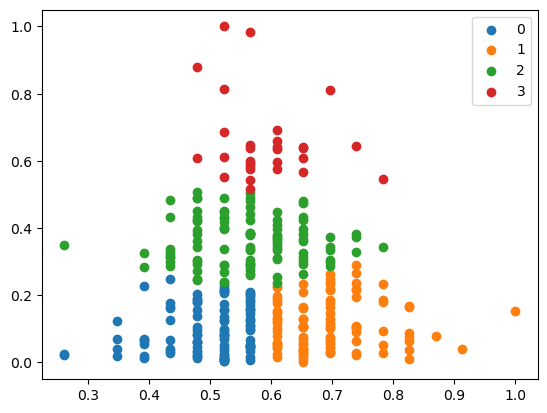

In [146]:
for label in np.unique(y_pred):
    plt.scatter(X[y_pred==label, 0] , X[y_pred==label,1], label=label)

plt.legend()

In [147]:
label_df = pd.DataFrame(data={'name':y,'label':y_pred})

In [150]:
label_df[label_df['label']==1]['name'].values

array(['Russian', 'Hill', 'Vienna', 'Kosygin', 'Egyptians', 'Jordanian',
       'the U.S. Government', 'East', 'Asian', 'Poland', 'Eastern Europe',
       'Romania', 'Sonnenfeldt', 'The United States',
       'the United Nations', 'the White House', 'the Security Council',
       'the United States Government', 'the People ’s Republic of China',
       'U.N.', 'Sudan', 'the Indian Ocean', 'Embassy', 'America',
       'White House', 'the State Department', 'Russia', 'Yugoslavia',
       'North', 'Morocco', 'Cairo', 'the Department of State', 'Helsinki',
       'Delegation', 'West Berlin', 'Brandt', 'South', 'Tehran', 'Bonn',
       'Party', 'Agency', 'World War II', 'HAK', 'Polish', 'Jamaica',
       'Le Duc Tho', 'English', 'Jewish', 'Jarring', 'Czechoslovakia',
       'ARVN', 'Cabinet', 'ROK', 'Commission', 'Protocol', 'JCS',
       'Palestinian', 'Africans', 'Security Council',
       'the General Assembly', 'IMF', 'Britain', 'OAU', 'GA', 'UNGA',
       'Assembly', 'NPT', 'IAEA', 'Mo